In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# set directory
parent_dir = os.path.dirname(os.getcwd())

fo = os.path.join(parent_dir, 'data', 'Envisioned_Speech_Recognition', 'Char')
os.chdir(parent_dir)
print("Updated Working Directory:", os.getcwd())

Updated Working Directory: c:\Users\ryoii\Desktop\EEG2IMAGE


In [3]:
from __00_load_edf import load_alphabet
from __01_transform_data import transform_eeg_data
from __02_model import train, visualize
from __01_transform_data import process_band
from __03_utils import plot_eeg, plot_eeg_1280

In [4]:
X, Y, channels = load_alphabet(fo)
print(f'shape of X : {X.shape}')
print(f'shape of Y : {Y.shape}')
print(channels)

Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_A.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Relevant Channels: ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_C.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_F.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_H.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_

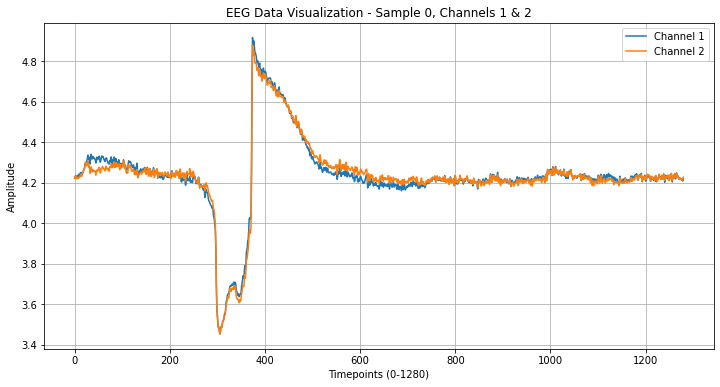

In [5]:
plot_eeg_1280(X, lim=1280)

In [6]:
selected_channels = [4,9]
dataset_type = 'alphabet'
channels  = 'two_channel'
X_new, Y_new = transform_eeg_data(X, Y, selected_channels)

print(f'shape of X_new : {X_new.shape}')
print(f'shape of Y_new : {Y_new.shape}')



shape of X_new : (36110, 32, 2)
shape of Y_new : (36110,)


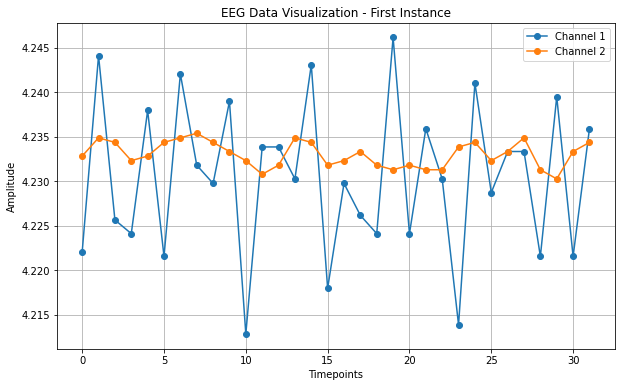

In [7]:
plot_eeg(X_new)

In [9]:
model = train(X_new, Y_new, dataset_type=dataset_type, epochs=500, channels=channels)
visualize(model, X_new, Y_new, dataset_type=dataset_type)

Epoch 1/5
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1236 - loss: 2.5334
Epoch 1: val_loss improved from inf to 2.31957, saving model to model/two_channel/model_alphabet_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.1236 - loss: 2.5321 - val_accuracy: 0.1018 - val_loss: 2.3196
Epoch 2/5
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1362 - loss: 2.2995
Epoch 2: val_loss did not improve from 2.31957
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.1362 - loss: 2.2993 - val_accuracy: 0.1044 - val_loss: 2.3933
Epoch 3/5
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1559 - loss: 2.2372
Epoch 3: val_loss did not improve from 2.31957
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.1559 - loss: 2.2371 - val_accuracy: 0.1063 - val_loss: 2.3578
Epoch 4/5
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1667 - loss: 2.2018
Epoch 4: val_loss did not improve from 2.31957
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - a

TypeError: visualize() missing 1 required positional argument: 'selected_channels'

In [ ]:
THETA = (4, 7)
ALPHA = (7, 15)
BETA = (15, 31)
GAMMA = (31, None)

In [ ]:
X_new, Y_new = process_band(X, Y, l_freq=THETA[0], h_freq=THETA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='THETA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)
print(model.summary())

In [ ]:
X_new, Y_new = process_band(X, Y, l_freq=ALPHA[0], h_freq=ALPHA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='ALPHA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

In [ ]:
X_new, Y_new = process_band(X, Y, l_freq=BETA[0], h_freq=BETA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='BETA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

In [ ]:
X_new, Y_new = process_band(X, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='GAMMA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)